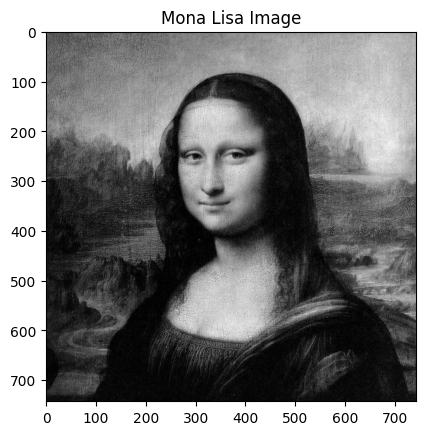

U shape: (743, 743)
E shape: (743,)
V_T shape: (743, 743)


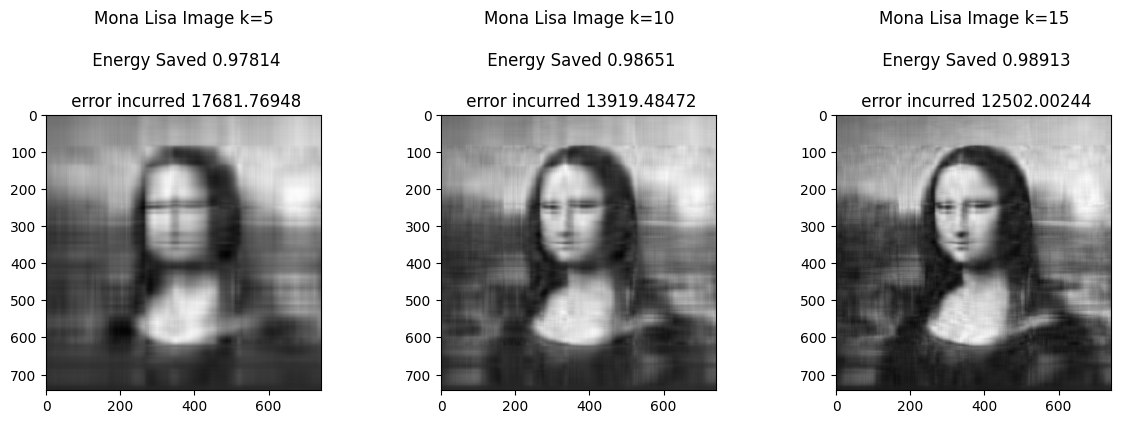

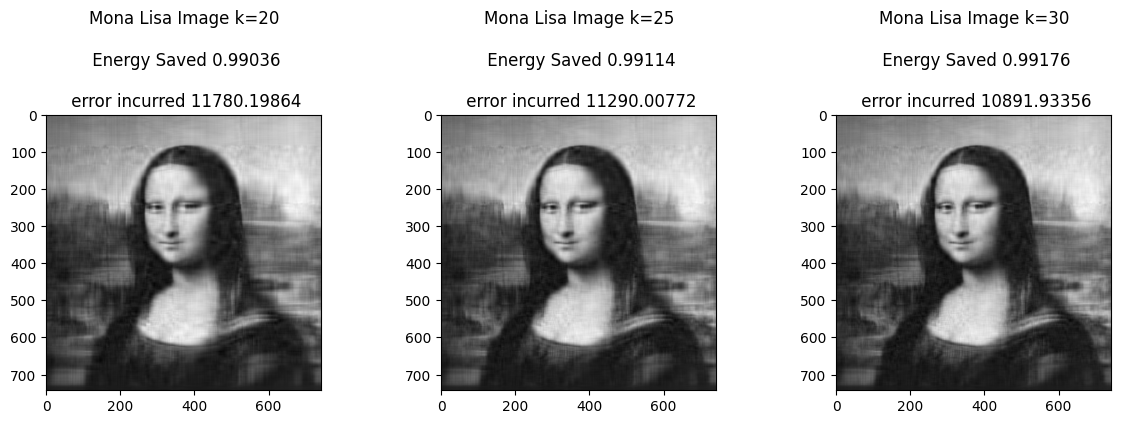

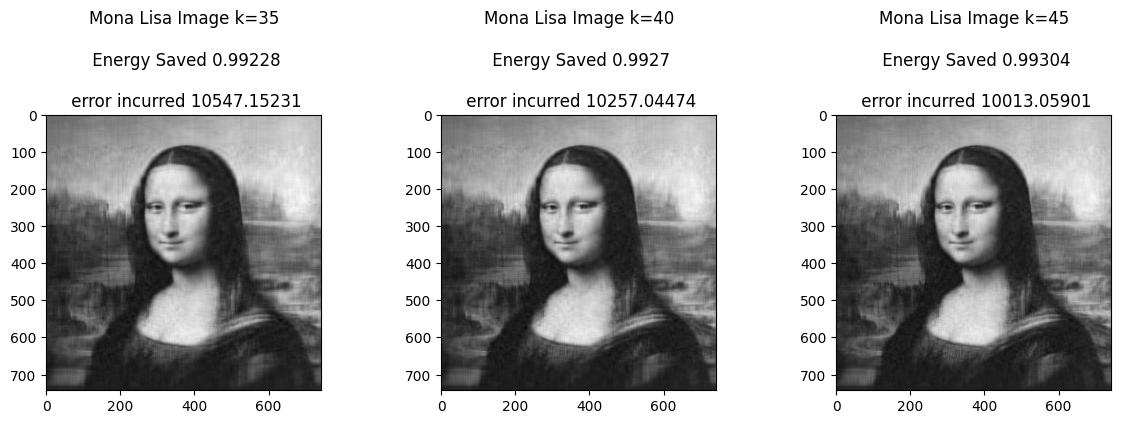

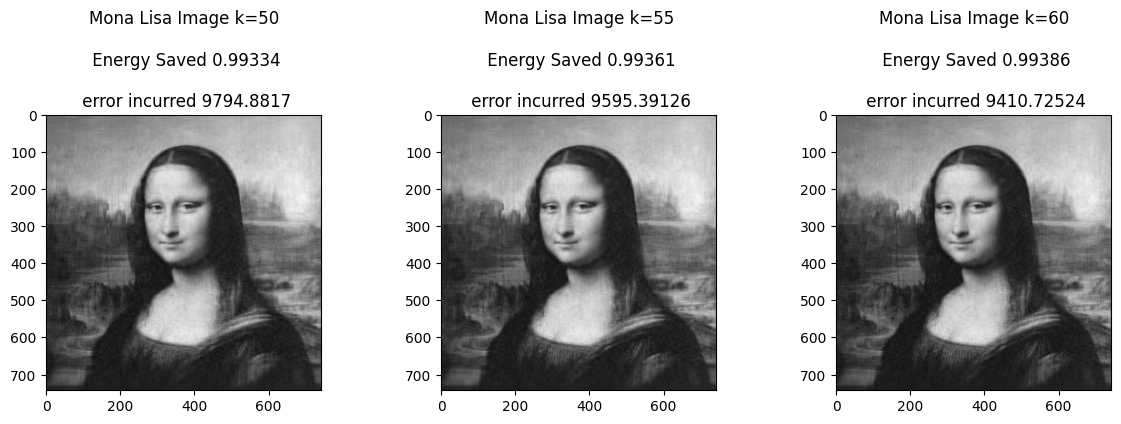

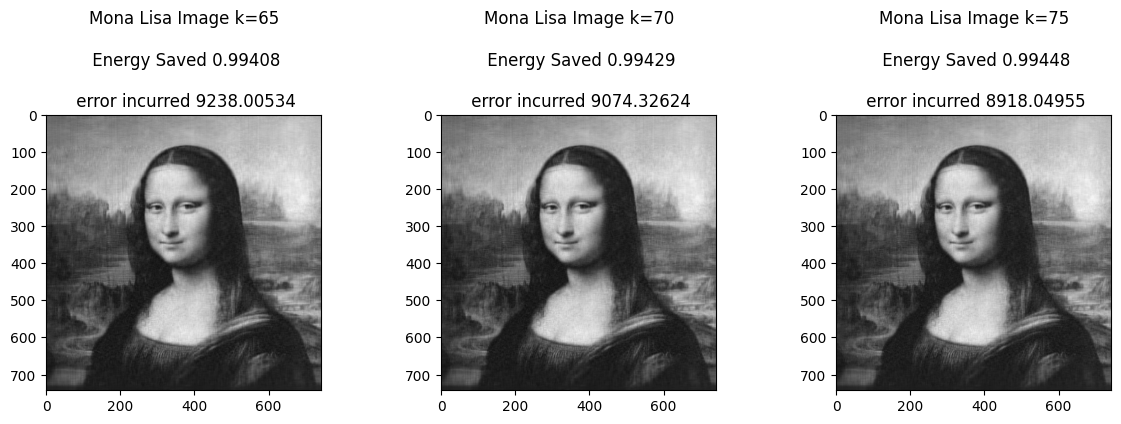

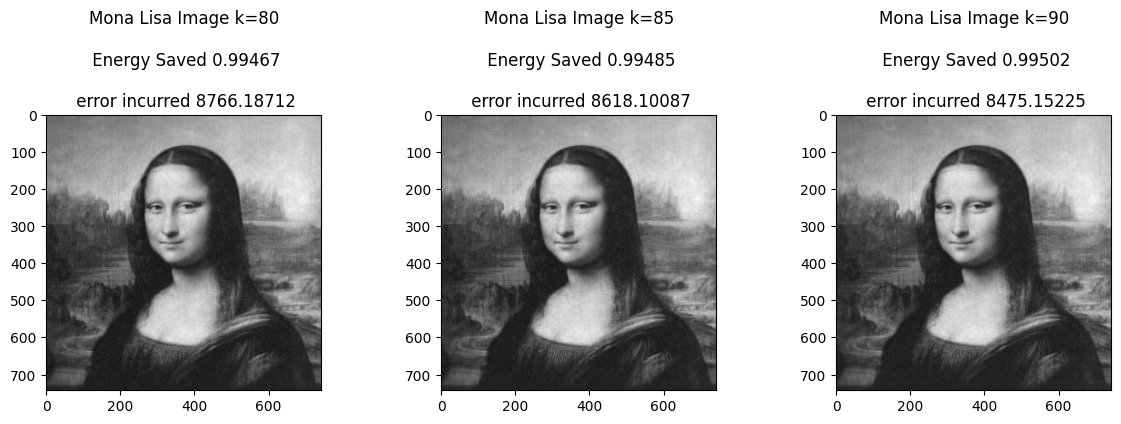

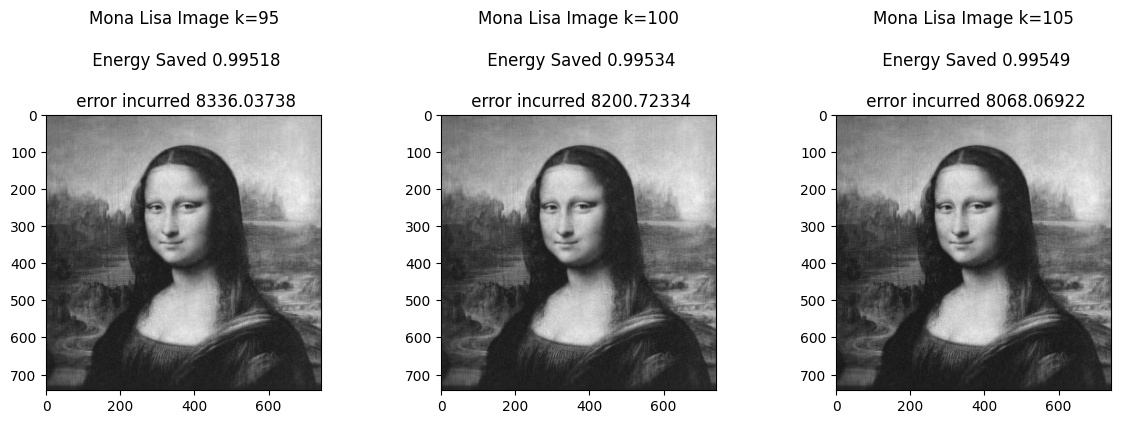

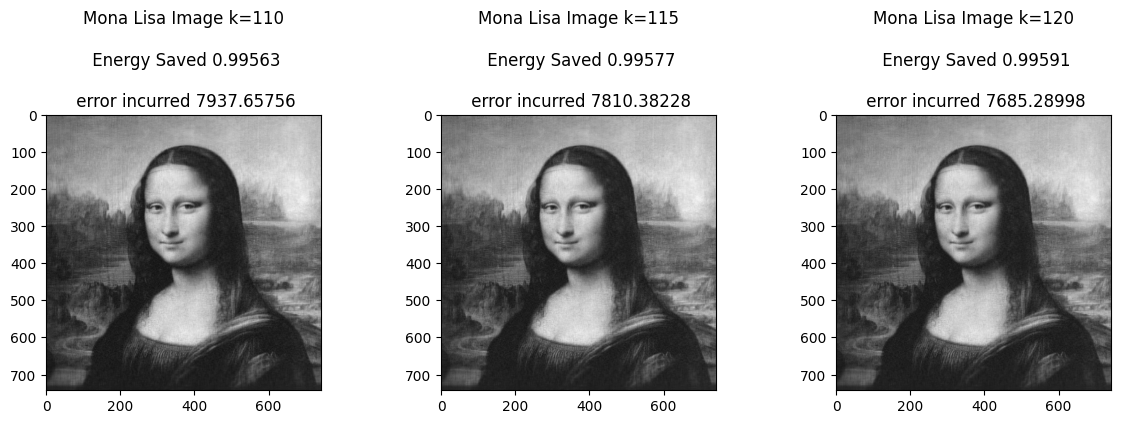

In [28]:
import cv2,numpy as np,matplotlib.pyplot as plt

image = cv2.imread('/content/Mona_Lisa_bw_square.jpeg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Mona Lisa Image')
plt.show()


image.shape
from math import sqrt

U,E,V_T = np.linalg.svd(image)


print("U shape:", U.shape)
print("E shape:", E.shape)
print("V_T shape:", V_T.shape)



squared_sum_t = sum(x**2 for x in E)

for k in range(0,120,15):
  i = 0
  fig, axs = plt.subplots(1,3, figsize=(12, 4))

  for j in range(5,20,5):
    reconstructed_image = np.matrix(U[:,:j+k]) * np.diag(E[:j+k]) * np.matrix(V_T[:j+k,:])

    squared_sum_e = sum(x**2 for x in E[j+k:])
    squared_sum_k = sum(x**2 for x in E[:j+k])

    Energy_Saved = sqrt(squared_sum_k) / sqrt(squared_sum_t)
    Error_Incurred = sqrt(squared_sum_e)

    axs[i].imshow(reconstructed_image, cmap='gray')
    axs[i].set_title(f'''Mona Lisa Image k={j+k}
                     \n Energy Saved {round(Energy_Saved,5)}
                     \n error incurred {round(Error_Incurred,5)}''')
    i+=1

  plt.tight_layout()
  plt.show()


